# Modélisation de l'usure d'un moteur d'avion 

In [2]:
# Importation des packages 
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates

In [3]:
path_safran = 'C:/Users/louis/OneDrive/Documents/ENSAE/2A/Safran/db_anonymisee_23112020.csv'
safran=pd.read_csv(path_safran,sep=';')

## 1- Nettoyage de la base 

In [4]:
safran.head()

,Unnamed: 0,engine_serial_number,engine_family,engine_series,date,cycles,cycles_counter,egt_margin,var_mot_1,flight_leg_hours,...,Config_B_rank,WW_indicator,WW_rank,config_A,config_B,var_env_1,var_env_2,var_env_3,var_env_4,var_env_5
0,1,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 06:29:58,"14,6994018817204",14,"0,88164595777172","-0,313549479463945","0,857777777777778",...,0.0,0,0.0,Config_A_1,Config_B_1,"-0,261068039892915","0,193871444563971","0,448626837816052",0.0,"0,601803253301208"
1,2,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 08:10:00,"15,2842741935484",15,"0,792029198534478","0,00633010844634316","0,794166666666667",...,0.0,0,0.0,Config_A_1,Config_B_1,"-0,0642022854971854","0,273855127894862","1,50084830667547",0.0,"-1,05696480756781"
2,3,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 09:55:00,"15,898185483871",16,"0,706729072821315","-0,286324152682434","0,736666666666667",...,0.0,0,0.0,Config_A_1,Config_B_1,"-0,292673075440896","0,193871444563971","0,764293278473876",0.0,"0,149411963973295"
3,4,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 11:36:53,"16,493874327957",17,"0,702077542200021","0,430173809670278","0,8025",...,0.0,0,0.0,Config_A_1,Config_B_1,"0,0700560728074165","0,273855127894862","1,50084830667547",0.0,"-1,05696480756781"
4,5,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 04:28:40,"22,4095430107527",18,"0,645940989733346","0,299419735518525","0,8175",...,0.0,0,0.0,Config_A_1,Config_B_1,"-0,463184861568854","0,193871444563971","0,448626837816052",0.0,"0,601803253301208"


In [5]:
safran.shape

(2913834, 25)

Nous avons sous la main une base de données d'environ 3 millions de lignes, chacune est représenté par 25 variables. 

### 1-1. Les formats 

In [83]:
safran.dtypes

Unnamed: 0                int64
engine_serial_number     object
engine_family            object
engine_series            object
date                     object
cycles                   object
cycles_counter            int64
egt_margin               object
var_mot_1                object
flight_leg_hours         object
event_rank                int64
egt_slope                object
SV_indicator              int64
SV_rank                 float64
Config_B_indicator        int64
Config_B_rank           float64
WW_indicator              int64
WW_rank                 float64
config_A                 object
config_B                 object
var_env_1                object
var_env_2                object
var_env_3                object
var_env_4               float64
var_env_5                object
dtype: object

Certaines variables ont un format qui ne leur correspond pas, réglons cela : 

In [6]:
# Transformation du format de la variable date en datetime 
safran['date'] = pd.to_datetime(safran['date'], format="%Y/%m/%d %H:%M:%S")

In [7]:
# Transformation du format des variable egt_margin, cycles, var_mot_1,flight_leg_hours et les variables environnementales 
# continues  en float (sauf pour les valeurs 'nan')
def replace_value (x):
    try: 
        return x.replace(",", ".")
    except AttributeError:
        return np.NaN
safran['egt_margin'] = safran['egt_margin'].map(replace_value)
safran['egt_margin']=pd.to_numeric(safran['egt_margin'])
safran['cycles'] = safran['cycles'].map(replace_value)
safran['cycles']=pd.to_numeric(safran['cycles'])
safran['var_mot_1']=safran['var_mot_1'].map(replace_value)
safran['var_mot_1']=pd.to_numeric(safran['var_mot_1'])
safran['flight_leg_hours']=safran['flight_leg_hours'].map(replace_value)
safran['flight_leg_hours']=pd.to_numeric(safran['flight_leg_hours'])
safran['egt_slope']=safran['egt_slope'].map(replace_value)
safran['egt_slope']=pd.to_numeric(safran['egt_slope'])
safran['var_env_1']=safran['var_env_1'].map(replace_value)
safran['var_env_1']=pd.to_numeric(safran['var_env_1'])
safran['var_env_2']=safran['var_env_2'].map(replace_value)
safran['var_env_2']=pd.to_numeric(safran['var_env_2'])
safran['var_env_3']=safran['var_env_3'].map(replace_value)
safran['var_env_3']=pd.to_numeric(safran['var_env_3'])
safran['var_env_5']=safran['var_env_5'].map(replace_value)
safran['var_env_5']=pd.to_numeric(safran['var_env_5'])

In [87]:
safran.dtypes

Unnamed: 0                       int64
engine_serial_number            object
engine_family                   object
engine_series                   object
date                    datetime64[ns]
cycles                         float64
cycles_counter                   int64
egt_margin                     float64
var_mot_1                      float64
flight_leg_hours               float64
event_rank                       int64
egt_slope                      float64
SV_indicator                     int64
SV_rank                        float64
Config_B_indicator               int64
Config_B_rank                  float64
WW_indicator                     int64
WW_rank                        float64
config_A                        object
config_B                        object
var_env_1                      float64
var_env_2                      float64
var_env_3                      float64
var_env_4                      float64
var_env_5                      float64
dtype: object

### 1-2. Les valeurs manquantes 

In [8]:
safran.isnull().sum()

Unnamed: 0                   0
engine_serial_number         0
engine_family                0
engine_series                0
date                         0
cycles                       0
cycles_counter               0
egt_margin              992605
var_mot_1               992607
flight_leg_hours        477302
event_rank                   0
egt_slope                90397
SV_indicator                 0
SV_rank                 992605
Config_B_indicator           0
Config_B_rank           992605
WW_indicator                 0
WW_rank                 992605
config_A                     0
config_B                     0
var_env_1               451389
var_env_2               258150
var_env_3               625419
var_env_4               622175
var_env_5               625530
dtype: int64

In [185]:
safran.head(20)

,Unnamed: 0,engine_serial_number,engine_family,engine_series,date,cycles,cycles_counter,egt_margin,var_mot_1,flight_leg_hours,...,Config_B_rank,WW_indicator,WW_rank,config_A,config_B,var_env_1,var_env_2,var_env_3,var_env_4,var_env_5
0,1,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 06:29:58,14.699402,14,0.881646,-0.313549,0.857778,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.261068,0.193871,0.448627,0.0,0.601803
1,2,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 08:10:00,15.284274,15,0.792029,0.006330,0.794167,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.064202,0.273855,1.500848,0.0,-1.056965
2,3,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 09:55:00,15.898185,16,0.706729,-0.286324,0.736667,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.292673,0.193871,0.764293,0.0,0.149412
3,4,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 11:36:53,16.493874,17,0.702078,0.430174,0.802500,...,0.0,0,0.0,Config_A_1,Config_B_1,0.070056,0.273855,1.500848,0.0,-1.056965
4,5,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 04:28:40,22.409543,18,0.645941,0.299420,0.817500,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.463185,0.193871,0.448627,0.0,0.601803
5,6,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 06:06:47,22.983209,19,0.784083,0.317381,0.857778,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.366676,0.273855,1.079960,0.0,-0.001385
6,7,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 09:21:07,24.119432,20,0.794602,0.302614,0.689722,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.477086,0.193871,0.974738,0.0,-0.805636
7,8,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 10:59:07,24.692416,21,0.650154,0.635736,0.651944,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.328584,0.234348,1.606070,0.0,-2.464404
8,9,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 14:27:15,25.909325,22,0.620501,0.351562,0.995000,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.214059,0.193871,0.869515,0.0,-0.805636
9,10,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 16:21:55,26.579755,23,0.932190,-0.246205,1.357778,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.109072,0.503899,0.974738,0.0,0.199678


De nombreuses variables ont un nombre important de valeurs manquantes.

#### 1-2.1 Traitement des valeurs manquantes pour egt_margin

In [9]:
print(' Part des valeurs manquantes pour egt_margin : ', int(safran['egt_margin'].isnull().sum() /safran['egt_margin'].size * 100),'%')

 Part des valeurs manquantes pour egt_margin :  34 %


egt_margin est la variable que nous cherchons à expliquer. Pour pouvoir entrainer et tester notre futur modèle il nous faudra l'ensemble des données. Il faut donc traiter les valeurs manquantes, qui représentent une part importante du dataframe pour cette varible (34%).  

Pour cela nous proposons d'appliquer la méthode des deux plus proches voisins 

In [1]:
from sklearn.impute import KNNImputer

In [17]:
df=safran.head(20)
df

,Unnamed: 0,engine_serial_number,engine_family,engine_series,date,cycles,cycles_counter,egt_margin,var_mot_1,flight_leg_hours,...,Config_B_rank,WW_indicator,WW_rank,config_A,config_B,var_env_1,var_env_2,var_env_3,var_env_4,var_env_5
0,1,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 06:29:58,14.699402,14,0.881646,-0.313549,0.857778,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.261068,0.193871,0.448627,0.0,0.601803
1,2,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 08:10:00,15.284274,15,0.792029,0.006330,0.794167,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.064202,0.273855,1.500848,0.0,-1.056965
2,3,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 09:55:00,15.898185,16,0.706729,-0.286324,0.736667,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.292673,0.193871,0.764293,0.0,0.149412
3,4,ESN_1,Engine_family_1,Engine_series_1,2019-04-29 11:36:53,16.493874,17,0.702078,0.430174,0.802500,...,0.0,0,0.0,Config_A_1,Config_B_1,0.070056,0.273855,1.500848,0.0,-1.056965
4,5,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 04:28:40,22.409543,18,0.645941,0.299420,0.817500,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.463185,0.193871,0.448627,0.0,0.601803
5,6,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 06:06:47,22.983209,19,0.784083,0.317381,0.857778,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.366676,0.273855,1.079960,0.0,-0.001385
6,7,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 09:21:07,24.119432,20,0.794602,0.302614,0.689722,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.477086,0.193871,0.974738,0.0,-0.805636
7,8,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 10:59:07,24.692416,21,0.650154,0.635736,0.651944,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.328584,0.234348,1.606070,0.0,-2.464404
8,9,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 14:27:15,25.909325,22,0.620501,0.351562,0.995000,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.214059,0.193871,0.869515,0.0,-0.805636
9,10,ESN_1,Engine_family_1,Engine_series_1,2019-04-30 16:21:55,26.579755,23,0.932190,-0.246205,1.357778,...,0.0,0,0.0,Config_A_1,Config_B_1,-0.109072,0.503899,0.974738,0.0,0.199678


In [18]:
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df[])
#df_imputed= pd.DataFrame(imputed, columns= df.egt_margin)

ValueError: could not convert string to float: 'ESN_1'

In [186]:
safran[safran['egt_margin'].isnull()]['SV_indicator']

12         0
29         0
31         0
59         0
74         0
          ..
2911283    0
2911284    0
2911285    0
2911286    0
2911293    0
Name: SV_indicator, Length: 992605, dtype: int64

In [169]:
safran[safran['egt_margin'].isnull()]['SV_indicator'][safran[safran['egt_margin'].isnull()]['SV_indicator']==1].index

Int64Index([   8105,   15520,   26455,   36085,   40198,   45381,   46253,
              64732,   65858,   73753,  112703,  130099,  148535,  153234,
             188260,  233645,  235796,  243197,  272125,  295957,  311086,
             321659,  333555,  336221,  339091,  373873,  383607,  407444,
             426500,  487722,  495398,  507619,  509097,  512536,  513251,
             522192,  529273,  539212,  543810,  547919,  556248,  560359,
             574067,  581102,  594243,  605052,  610121,  614791,  615668,
             631120,  634241,  657062,  662152,  664281,  683181,  686457,
             690139,  693239,  712150,  713358,  741614,  742698,  749578,
             775581,  792461,  795399,  796241,  818957,  824834,  834095,
             869607,  878368,  885606,  928433,  972832,  998641, 1044665,
            1086821, 1116665, 1123374, 1169993, 1177064, 1179062, 1217462,
            1279547, 1442206, 1444835, 1510675, 1622435, 1640590, 1646297,
            1806458, 2200

In [141]:
safran.egt_margin[safran.egt_margin== pd.np.nan]

C:\Users\louis\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


Series([], Name: egt_margin, dtype: float64)

In [37]:
safran['date'].dt.strftime('%Y')[:10]

0    2019
1    2019
2    2019
3    2019
4    2019
5    2019
6    2019
7    2019
8    2019
9    2019
Name: date, dtype: object

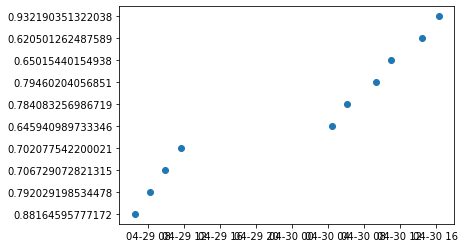

In [39]:
dates = matplotlib.dates.date2num(safran['date'])
plt.plot_date(dates[:10], safran['egt_margin'][:10])